## Part One
The objective of this block of code is to group the cluster populous city in each state by
factors that make them appealing to Electic Vehicle owners. 

The blog post accompaning this project explains more

In [952]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#import
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')


Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [953]:
#import geographic data of all EV chargers in the US with LAT and LNG coordinates

df1 = pd.read_csv("C:/Users/Trevor/Desktop/Test_3.csv")
df1.head()

T:\Programs\Anaconda_II\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (20,31,39,45,46,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source
0,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,nan,213-741-1151,E,nan,Public,24 hours daily; pay lot,NaN,nan,nan,nan,nan,12.000000,nan,NaN,Non-Networked,NaN,GPS,34.040539,-118.271387,2020-11-09,1523,2020-11-09 16:53:32 UTC,P,nan,NaN,1995-08-30,nan,nan,nan,nan,J1772,US,NaN,NaN,nan,Public,nan,public,NaN,NaN,PARKING_GARAGE,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,NaN
1,ELEC,Cherokee & Hollywood Parking Garage,1718 N Cherokee Ave,NaN,Los Angeles,CA,90028,nan,213-550-9904,E,nan,Public,24 hours daily; pay lot,NaN,nan,nan,nan,nan,4.000000,nan,NaN,Non-Networked,NaN,200-8,34.102404,-118.334758,2019-05-09,1526,2020-01-21 18:34:38 UTC,P,nan,NaN,1995-08-15,nan,nan,nan,nan,J1772,US,NaN,NaN,nan,Public,nan,public,NaN,NaN,PARKING_GARAGE,nan,nan,nan,nan,nan,nan,Free,NaN,nan,nan,nan,nan,nan,nan,nan,NaN
2,ELEC,California Air Resources Board,9530 Telstar Ave,NaN,El Monte,CA,91731,nan,626-575-6800,E,nan,Public,24 hours daily,NaN,nan,nan,nan,nan,4.000000,nan,NaN,Non-Networked,NaN,GPS,34.068720,-118.064000,2019-09-09,1583,2020-01-21 18:34:38 UTC,SG,nan,NaN,1996-10-15,nan,nan,nan,nan,J1772,US,NaN,NaN,nan,Public,nan,public,NaN,NaN,STATE_GOV,nan,nan,nan,nan,nan,nan,Free,NaN,nan,nan,nan,nan,nan,nan,nan,NaN
3,ELEC,Scripps Green Hospital,10666 N Torrey Pines Rd,"Patient Parking Structure, level G",La Jolla,CA,92037,nan,858-554-9100,E,nan,Public,24 hours daily,NaN,nan,nan,nan,nan,1.000000,nan,NaN,Non-Networked,NaN,GPS,32.899470,-117.243000,2019-12-12,6355,2020-01-21 18:34:38 UTC,P,nan,NaN,1997-07-30,nan,nan,nan,nan,J1772,US,NaN,NaN,nan,Public,nan,public,NaN,NaN,HOSPITAL,nan,nan,nan,nan,nan,nan,Pay to Park,NaN,nan,nan,nan,nan,nan,nan,nan,NaN
4,ELEC,San Diego Wild Animal Park,15500 San Pasqual Valley Rd,NaN,Escondido,CA,92027,nan,760-747-8702,E,nan,Public,24 hours daily,NaN,nan,nan,nan,nan,2.000000,nan,NaN,Non-Networked,NaN,200-9,33.098589,-117.004433,2019-02-06,6384,2020-01-21 18:34:38 UTC,P,nan,NaN,2014-09-02,nan,nan,nan,nan,J1772,US,NaN,NaN,nan,Public,nan,public,NaN,NaN,PAY_LOT,nan,nan,nan,nan,nan,nan,Free,NaN,nan,nan,nan,nan,nan,nan,nan,NaN


In [1340]:
# groupby city and get the count of chargers in that city
df2 = df1.groupby(['City']).count()
df2.drop(['Fuel Type Code', 'Station Name'], axis = 1, inplace = True)
df2.head()

,Street Address,Intersection Directions,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100 fifth Ave,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
70 Mile House,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
ANTHEM,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Abbotsford,27,10,27,27,0,27,27,0,27,27,1,0,0,0,2,22,5,0,27,22,27,27,27,27,27,27,7,0,0,7,0,0,0,0,27,27,0,14,0,27,0,27,0,0,6,0,0,0,0,0,0,19,6,0,0,0,0,0,0,0,0
Aberdeen,11,1,11,11,0,11,11,0,11,11,0,0,0,0,0,9,4,0,11,8,11,11,11,11,11,11,6,0,0,6,0,0,0,0,11,11,0,0,0,11,0,11,2,0,4,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0


In [1341]:
#drop unnessecary columns
df2.drop(['Street Address','Intersection Directions', 'ZIP','Plus4','Station Phone', 'Status Code', 
         'Expected Date', 'Groups With Access Code', 'Access Days Time', 'Cards Accepted','BD Blends',
         'NG Fill Type Code','NG PSI','EV Level1 EVSE Num',
         'EV Level2 EVSE Num','EV DC Fast Count', 'EV Other Info', 'EV Network',
          'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude','Date Last Confirmed','ID','Updated At',
          'Owner Type Code','Federal Agency ID','Federal Agency Name','Open Date','Hydrogen Status Link',
          'NG Vehicle Class','LPG Primary','E85 Blender Pump','EV Connector Types','Country','Intersection Directions (French)',
          'Access Days Time (French)','BD Blends (French)','Groups With Access Code (French)','Hydrogen Is Retail',
          'Access Code','Access Detail Code','Federal Agency Code','Facility Type','CNG Dispenser Num',
          'CNG On-Site Renewable Source','CNG Total Compression Capacity','CNG Storage Capacity',
          'LNG On-Site Renewable Source','E85 Other Ethanol Blends','EV Pricing',
          'EV Pricing (French)','LPG Nozzle Types','Hydrogen Pressures',
          'Hydrogen Standards','CNG Fill Type Code','CNG PSI','CNG Vehicle Class',
          'LNG Vehicle Class','EV On-Site Renewable Source'], axis = 1, inplace = True)

In [1342]:
# scrape the web for data on the populous cities in the each US state
# and add to new data frame
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_largest_cities_of_U.S._states_and_territories_by_population")[0]

#sort by postal code to append later data frame easier
df.sort_values(['State, federaldistrict, or territory'])
df.head()

,"State, federaldistrict, or territory","State, federal district,or territory population[5]",Most populous,City population,2nd most populous,3rd most populous,4th most populous,5th most populous,Capital (if nototherwise listed)
0,Alabama,4887871,Birmingham,209880,"Huntsville (204,189)","Montgomery (198,956)","Mobile (189,572)","Tuscaloosa (101,113) [6]",NaN
1,Alaska,737438,Anchorage,291538,"Juneau (32,113)","Fairbanks (31,516)","Wasilla (10,529)","Sitka (8,647)",NaN
2,American Samoa,"55,519[7]",Tafuna,"7,945[8]","Nu'uuli (3,955)","Pago Pago (3,656)","'Ili'ili (3,195)","Pava'ia'i (2,450)",[note 1]
3,Arizona,7171646,Phoenix,1660272,"Tucson (545,975)","Mesa (508,958)","Chandler (257,165)","Scottsdale (255,310)",NaN
4,Arkansas,3013825,Little Rock,197881,"Fort Smith (87,845)","Fayetteville (86,751)","Springdale (81,029)","Jonesboro (76,990)",NaN


In [1343]:
# again, drop unneeded columns
df.drop(['State, federal district,or territory population[5]', '2nd most populous', '3rd most populous', '4th most populous','5th most populous', 'Capital (if nototherwise listed)' ], axis=1, inplace = True)
df.head()

,"State, federaldistrict, or territory",Most populous,City population
0,Alabama,Birmingham,209880
1,Alaska,Anchorage,291538
2,American Samoa,Tafuna,"7,945[8]"
3,Arizona,Phoenix,1660272
4,Arkansas,Little Rock,197881


In [1344]:
# rename columns to be more concise and easier to type out later
df.rename(columns={"State, federaldistrict, or territory": "State", "Most populous": "City", 'City population':'Population'}, inplace = True)
df.head()

,State,City,Population
0,Alabama,Birmingham,209880
1,Alaska,Anchorage,291538
2,American Samoa,Tafuna,"7,945[8]"
3,Arizona,Phoenix,1660272
4,Arkansas,Little Rock,197881


In [1345]:
#drop non-us state rows
df.drop([2, 9, 12, 37, 42, 50], inplace = True)
df.shape

(50, 3)

In [1346]:
# merge on the city column and rename the columns that were re-named
dfU = pd.merge(df, df2, on = ['City'])
dfU.rename(columns={"State_x": "State",'State_y' : 'Number of Chargers'}, inplace = True)

In [1348]:
#check the head of the data
dfU.head()

,State,City,Population,Number of Chargers
0,Alabama,Birmingham,209880,23
1,Alaska,Anchorage,291538,7
2,Arizona,Phoenix,1660272,133
3,Arkansas,Little Rock,197881,24
4,California,Los Angeles,3994928,768


In [1350]:
dfU.shape

(49, 4)

In [1351]:
# after checking the shape and doing som digging, 
#the merge dropped Hawaii, so I had to add that back manually
new_row = {'State':'Hawaii', 'City':'Honolulu', 'Population':347397, 
           'Number of Chargers':118}
#append row to the dataframe
df6 = dfU
df6 = df6.append(new_row, ignore_index=True)

In [1352]:
#confirm data is the correct size
df6.shape

(50, 4)

In [1353]:
# double checking the data revealed New York had only 1 charger listed instead of the 
# correct 343
df6.at[31, 'Number of Chargers'] = 343

In [1354]:
#check dtypes to ensure future calculations are possible
df6.dtypes

State                 object
City                  object
Population            object
Number of Chargers     int64
dtype: object

In [1355]:
#cast population to int to ensure we can divide later on
df6["Population"] = df6["Population"].astype(str).astype(int)
print(df6.dtypes)

State                 object
City                  object
Population             int32
Number of Chargers     int64
dtype: object


In [1356]:
#divide number of chargers by population to get chargers per person
# yes, this is a small number, but it makes our job normalizing the data
# easier later on so bear with me
df6['Chargers per Person'] = df6['Number of Chargers']/df6['Population']
pd.options.display.float_format = '{:.6f}'.format
df6.head()

,State,City,Population,Number of Chargers,Chargers per Person
0,Alabama,Birmingham,209880,23,0.000110
1,Alaska,Anchorage,291538,7,0.000024
2,Arizona,Phoenix,1660272,133,0.000080
3,Arkansas,Little Rock,197881,24,0.000121
4,California,Los Angeles,3994928,768,0.000192


In [1357]:
df_M1 = df6.sort_values(['Chargers per Person'])

In [1358]:
#drop the redundant columns
df_M1.drop(['Number of Chargers', 'Population'], axis  =1, inplace = True)

In [1359]:
df_M1.head()

,State,City,Chargers per Person
14,Kansas,Wichita,0.000023
1,Alaska,Anchorage,0.000024
25,Montana,Billings,0.000026
40,South Dakota,Sioux Falls,0.000038
36,Pennsylvania,Philadelphia,0.000039


This is data I experimented with early on in the process. It is a data frame of how each state voted in the 2020 election, as politics play a large part in EV adoption. However, I was unable to normalize this data later on and felt it best not to include it. However, I am leaving it here should you, dear reader, want to play with this data on your own. 

In [974]:
# create df for how each state voted in the last election
#using binary operators: Democrat = 1, Republican = 0
#this is purely for classification purposes
#Votes = {
    #'State' : ['Alabama', 'Alaska', 'Arizona', 'Arkansas','California', 'Colorado',
              # 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois'
             #  ,'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
             #  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
             #  'Montana', 'Nebraska', 'Nevada','New Hampshire', 'New Jersey', 
             #  'New Mexico','New York', 'North Carolina', 'North Dakota', 'Ohio','Oklahoma',
            #   'Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota',
           #    'Tennessee','Texas','Utah','Vermont','Virginia',
           #    'Washington','West Virginia','Wisconsin','Wyoming'],
   # 'Political Orientation': [0,0,1,0,1,1,1, 1,0,1,0,0,1,0,0,0,0,0,1,1,
                              #1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,
                            #  1,1,1,0,1,0]
  #  }
#df_poli = pd.DataFrame(data=Votes)
#df_poli.shape

In [1360]:
#df_M2 = pd.merge(df_M1, df_poli, on = ['State'])
#df_M2.shape
df_M2 = df_M1

In [1361]:
# scrape the web for the cost of electricity in each state and add to new data frame
dfER=pd.read_html("https://neo.ne.gov/programs/stats/inf/204.htm")[0]

#sort by state to append later data frame easier
dfER.sort_values(['State'])
dfER.head()

,Rank,State,Average Electricity Ratefor All Sectors(Cents per Kilowatthour)
0,1.000000,Louisiana,7.710000
1,2.000000,Arkansas,7.780000
2,3.000000,Washington,8.000000
3,4.000000,Oklahoma,8.090000
4,4.000000,Wyoming,8.090000


In [1362]:
#drop redundant rank column
dfER.drop(['Rank'], axis = 1, inplace = True)
dfER.head()

,State,Average Electricity Ratefor All Sectors(Cents per Kilowatthour)
0,Louisiana,7.710000
1,Arkansas,7.780000
2,Washington,8.000000
3,Oklahoma,8.090000
4,Wyoming,8.090000


In [1363]:
df_M3 = pd.merge(df_M2, dfER, on = ['State'])
df_M3.shape

(50, 4)

In [1364]:
df_M3.head()

,State,City,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour)
0,Kansas,Wichita,0.000023,10.720000
1,Alaska,Anchorage,0.000024,19.360000
2,Montana,Billings,0.000026,8.840000
3,South Dakota,Sioux Falls,0.000038,9.970000
4,Pennsylvania,Philadelphia,0.000039,10.100000


In [1365]:
#read local .csv regarding EV sales data I had to manually create
# as the data was not availible to be scraped or imported elsewhere
df_EVD = pd.read_csv("C:/Users/Trevor/Desktop/EV_Data.csv")
df_EVD.head()

,State,EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation
0,Alabama,0.410000,115.790000,0.294522
1,Alaska,0.590000,59.460000,0.338602
2,Arizona,1.840000,104.440000,0.374288
3,Arkansas,0.350000,118.750000,0.276729
4,California,7.840000,56.180000,0.580572


In [1366]:
df_M4 = pd.merge(df_M3, df_EVD, on = ['State'])
df_M4.shape

(50, 7)

In [1367]:
df_M4.head()

,State,City,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation
0,Kansas,Wichita,0.000023,10.720000,0.960000,95.920000,0.304670
1,Alaska,Anchorage,0.000024,19.360000,0.590000,59.460000,0.338602
2,Montana,Billings,0.000026,8.840000,0.470000,67.860000,0.255259
3,South Dakota,Sioux Falls,0.000038,9.970000,0.350000,59.090000,0.427495
4,Pennsylvania,Philadelphia,0.000039,10.100000,0.920000,67.270000,0.279246


Here is another dataframe I played with, but ended up not using. Income is important when making demographic analysis, but I felt it does not impact the buying of an electic car specifically, nor does it impact how a city or state might react in terms of future legislation regarding EVs

In [1368]:
# create df for median household income per city.
#using the city as analogous with state for 
#the sake of merging it with the master df later
#Income = {
#    'State' : ['Alabama', 'Alaska', 'Arizona', 'Arkansas','California', 'Colorado',
#               'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois'
#               ,'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
 #              'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
 #              'Montana', 'Nebraska', 'Nevada','New Hampshire', 'New Jersey', 
 #              'New Mexico','New York', 'North Carolina', 'North Dakota', 'Ohio','Oklahoma',
  #             'Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota',
 #              'Tennessee','Texas','Utah','Vermont','Virginia',
 #              'Washington','West Virginia','Wisconsin','Wyoming'],
 #   'Median Income': [35346,83280,54765,49957, 58385, 63793,45441,
 #                             42845,52576, 55279, 82906, 56798, 55198,
 #                             46442, 52251, 50867, 51307, 39576, 56977, 48840, 
 #                             65833, 29481, 58993, 37563, 52405, 57172,
 #                             56780, 54694, 58227, 35181, 51128, 60762, 60886,
 #                             53309, 51612, 54034,65740, 43744, 42158, 64599, 59017, 
 #                             55873, 51140, 56370, 50324, 74186, 85562, 
 #                             41701, 40036, 63235]
 #   }
#df_income = pd.DataFrame(data=Income)
#df_income.shape

In [1369]:
#df_income.head()

In [1370]:
#df_M3 = pd.merge(df_M2, df_income, on = ['State'])
#df_M3.shape

In [1371]:
#df_M3.head()

In [1372]:
# create df for electric vehicle incentives by state
# ignoring the federal tax credit
EV_I = {
    'State' : ['Alabama', 'Alaska', 'Arizona', 'Arkansas','California', 'Colorado',
               'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois'
               ,'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
               'Montana', 'Nebraska', 'Nevada','New Hampshire', 'New Jersey', 
               'New Mexico','New York', 'North Carolina', 'North Dakota', 'Ohio','Oklahoma',
               'Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota',
               'Tennessee','Texas','Utah','Vermont','Virginia',
               'Washington','West Virginia','Wisconsin','Wyoming'],
    'EV Rebate': [0,0,0,0, 2500, 5000, 0,
                              2500,0, 0, 0, 0, 0,
                              0, 0, 0, 0, 3000, 0, 3000, 
                              0, 0, 0, 0, 0, 0,
                              0, 0, 0, 525, 0, 2000, 0,
                              0, 0, 0, 2500, 0, 0, 0, 0, 
                              0, 0, 0, 0, 0, 2500, 
                              0, 0, 0]
    }
df_EVI = pd.DataFrame(data=EV_I)
df_EVI.shape

(50, 2)

In [1373]:
df_M5 = pd.merge(df_M4, df_EVI, on = ['State'])
df_M5.head()

,State,City,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
0,Kansas,Wichita,0.000023,10.720000,0.960000,95.920000,0.304670,0
1,Alaska,Anchorage,0.000024,19.360000,0.590000,59.460000,0.338602,0
2,Montana,Billings,0.000026,8.840000,0.470000,67.860000,0.255259,0
3,South Dakota,Sioux Falls,0.000038,9.970000,0.350000,59.090000,0.427495,0
4,Pennsylvania,Philadelphia,0.000039,10.100000,0.920000,67.270000,0.279246,0


In [1374]:
df_M5.shape

(50, 8)

In [1375]:
df_M5.head(2)

,State,City,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
0,Kansas,Wichita,0.000023,10.720000,0.960000,95.920000,0.304670,0
1,Alaska,Anchorage,0.000024,19.360000,0.590000,59.460000,0.338602,0


In [1376]:
df.head()

,State,City,Population
0,Alabama,Birmingham,209880
1,Alaska,Anchorage,291538
3,Arizona,Phoenix,1660272
4,Arkansas,Little Rock,197881
5,California,Los Angeles,3994928


In [1377]:
#df_city = df_M5.groupby(['City']).mean().reset_index()
#df_maybe2 = pd.merge(df_city, df, on='City')
#df_maybe2.drop(['State','Population'], axis = 1, inplace = True)
#df_maybe2.shape

In [1378]:
#ew_row2 = {'City':'Honolulu', 'Persons per Charger':2944.04, 'Political Orientation':1, 
           #Average Electricity Ratefor All Sectors(Cents per Kilowatthour)':29.18, 'EV Market Share (2018)'
         # :2.59, 'YoY Share % increase (2018/2017)': 11.16, '2018 Co2 Emissions from Transportation':
           #.58, 'EV Rebate':0}
#append row to the dataframe
#f_Master = df_maybe2
#f_Master = df_maybe2.append(new_row2, ignore_index=True)
#df_Master.drop(["Honolulu1"], axis = 0)
#f_Master

In [1379]:
#created a new dataframe grouped by state, though we are talking about cities,
# it was much cleaner to do it this way.
#I dropped city and population to perform the necessary KMeans testing
df_city = df_M5.groupby(['State']).mean().reset_index()
df_maybe = pd.merge(df_city, df, on = ['State'])
df_maybe.drop(['City','Population'], axis = 1, inplace = True)
df_maybe.shape

(50, 7)

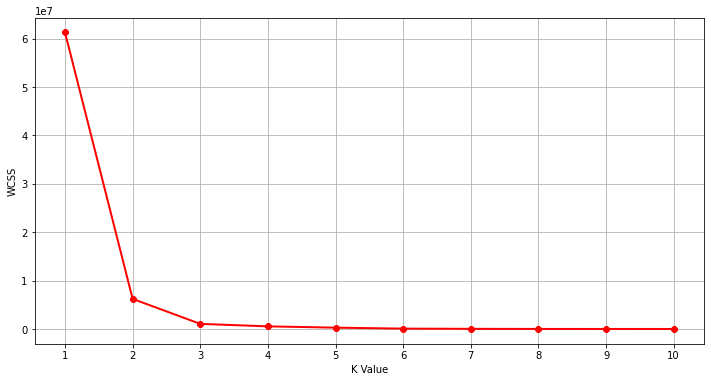

In [1380]:
#perform a k-means elbow test to determine how many clusters we should have
# two, however, seemed very low, so I went with 3 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_maybe.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [1381]:

# set number of clusters
kclusters = 3

clustering = df_maybe.drop('State', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 1, 0, 2, 0, 0])

In [1382]:
# add clustering labels
df_maybe.insert(0, 'Cluster Labels', kmeans.labels_)


In [1383]:
df_maybe.loc[df_maybe['Cluster Labels'] == 0, df_maybe.columns[[1,2,3,4] + list(range(5, df_maybe.shape[1]))]]

,State,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
0,Alabama,0.000110,9.630000,0.410000,115.790000,0.294522,0
1,Alaska,0.000024,19.360000,0.590000,59.460000,0.338602,0
2,Arizona,0.000080,10.850000,1.840000,104.440000,0.374288,0
3,Arkansas,0.000121,7.780000,0.350000,118.750000,0.276729,0
6,Connecticut,0.000083,18.410000,2.020000,45.320000,0.409793,0
8,Florida,0.000092,10.310000,1.030000,98.080000,0.473793,0
9,Georgia,0.000648,9.620000,1.180000,122.640000,0.411381,0
10,Hawaii,0.000340,29.180000,2.590000,11.160000,0.577357,0
11,Idaho,0.000131,8.170000,0.770000,87.800000,0.571282,0
12,Illinois,0.000061,9.600000,1.200000,93.550000,0.322747,0


In [1384]:
df_maybe.loc[df_maybe['Cluster Labels'] == 1, df_maybe.columns[[1,2,3,4] + list(range(5, df_maybe.shape[1]))]]

,State,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
5,Colorado,0.000241,10.020000,2.610000,66.240000,0.328761,5000


In [1386]:
#I call this the top 7, as they rank with Los Angeles, CA a city and the first state
# to declare bans on ICE cars in the future. 
# as such, these are the states I will normalize and rank according to 
#these metrics 
df_top7 = df_maybe.loc[df_maybe['Cluster Labels'] == 2, df_maybe.columns[[1,2,3,4] + list(range(5, df_maybe.shape[1]))]]
df_top7

,State,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
4,California,0.000192,16.580000,7.840000,56.180000,0.580572,2500
7,Delaware,0.000467,10.550000,1.270000,47.670000,0.360380,2500
17,Louisiana,0.000045,7.710000,0.280000,86.670000,0.190216,3000
19,Maryland,0.000305,11.570000,1.910000,91.900000,0.472562,3000
31,New York,0.000039,14.830000,1.560000,51.460000,0.440393,2000
36,Oregon,0.000239,8.850000,3.410000,44.490000,0.533036,2500
46,Washington,0.000289,8.000000,4.280000,70.520000,0.575049,2500


In [1388]:
from sklearn import preprocessing

In [1389]:
#df_cluster3 = df_top7.drop(['State'], axis = 1,inplace = True )
#type(df_cluster3)

In [1390]:
#normalize the top7 dataframe to analyze more closely
df_cluster3 = df_top7.drop(['State'], axis = 1,)
x = df_cluster3.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

In [1392]:
# create new dataframe and rename columns for legibility
df_normalized.rename(columns={0: "Chargers Per Person", 1: "Average Electricity Ratefor All Sectors(Cents per Kilowatthour)", 
                              2:'EV Market Share (2018)',
                              3:'YoY Share % increase (2018/2017)',
                             4: '2018 Co2 Emissions from Transportation',
                             5: 'EV Rebate',
                             }, inplace = True)
df_normalized

,Chargers Per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
0,0.358447,1.000000,1.000000,0.246572,1.000000,0.500000
1,1.000000,0.320180,0.130952,0.067074,0.435920,0.500000
2,0.015738,0.000000,0.000000,0.889686,0.000000,1.000000
3,0.621754,0.435175,0.215608,1.000000,0.723303,1.000000
4,0.000000,0.802706,0.169312,0.147015,0.640893,0.000000
5,0.467461,0.128523,0.414021,0.000000,0.878224,0.500000
6,0.585329,0.032694,0.529101,0.549040,0.985850,0.500000


In [1394]:
#the next few cells involve inverting the score of the 
#electricity cost column, as a higher cost should lower the score
dfi = df_normalized['Average Electricity Ratefor All Sectors(Cents per Kilowatthour)']-[1] 
dfi

0    0.000000
1   -0.679820
2   -1.000000
3   -0.564825
4   -0.197294
5   -0.871477
6   -0.967306
Name: Average Electricity Ratefor All Sectors(Cents per Kilowatthour), dtype: float64

In [1395]:
dfii = dfi.abs()
dfiii = dfii.to_frame()
dfiii

,Average Electricity Ratefor All Sectors(Cents per Kilowatthour)
0,0.000000
1,0.679820
2,1.000000
3,0.564825
4,0.197294
5,0.871477
6,0.967306


In [1396]:
df_normalized.rename(columns={ "Average Electricity Ratefor All Sectors(Cents per Kilowatthour)":'Drop',
                             }, inplace = True)
df_normalized

,Chargers Per Person,Drop,EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
0,0.358447,1.000000,1.000000,0.246572,1.000000,0.500000
1,1.000000,0.320180,0.130952,0.067074,0.435920,0.500000
2,0.015738,0.000000,0.000000,0.889686,0.000000,1.000000
3,0.621754,0.435175,0.215608,1.000000,0.723303,1.000000
4,0.000000,0.802706,0.169312,0.147015,0.640893,0.000000
5,0.467461,0.128523,0.414021,0.000000,0.878224,0.500000
6,0.585329,0.032694,0.529101,0.549040,0.985850,0.500000


In [1397]:
df_final = pd.concat([df_normalized, dfiii], axis = 1)
df_final

,Chargers Per Person,Drop,EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate,Average Electricity Ratefor All Sectors(Cents per Kilowatthour)
0,0.358447,1.000000,1.000000,0.246572,1.000000,0.500000,0.000000
1,1.000000,0.320180,0.130952,0.067074,0.435920,0.500000,0.679820
2,0.015738,0.000000,0.000000,0.889686,0.000000,1.000000,1.000000
3,0.621754,0.435175,0.215608,1.000000,0.723303,1.000000,0.564825
4,0.000000,0.802706,0.169312,0.147015,0.640893,0.000000,0.197294
5,0.467461,0.128523,0.414021,0.000000,0.878224,0.500000,0.871477
6,0.585329,0.032694,0.529101,0.549040,0.985850,0.500000,0.967306


In [1398]:
#df_final.drop(['Average Electricity Ratefor All Sectors(Cents per Kilowatthour)'], axis = 1, inplace = True)
#df_final2 = pd.concat([df_final, dfiii])
#df_final2

In [1399]:
df_final2 = df_final
df_final2.drop(['Drop'], axis=1, inplace = True)

In [1401]:
# re-add the states for legibility
df_states = pd.DataFrame(['CA', 'DE','LA','MD', 'NY', 'OR', 'WA'],
                   columns=['State'])
df_states

,State
0,CA
1,DE
2,LA
3,MD
4,NY
5,OR
6,WA


In [1402]:
df_final_norm = pd.concat([df_states, df_final2], axis = 1)
#pd.options.display.float_format = '{:.2f}'.format
df_final_norm

,State,Chargers Per Person,EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate,Average Electricity Ratefor All Sectors(Cents per Kilowatthour)
0,CA,0.358447,1.000000,0.246572,1.000000,0.500000,0.000000
1,DE,1.000000,0.130952,0.067074,0.435920,0.500000,0.679820
2,LA,0.015738,0.000000,0.889686,0.000000,1.000000,1.000000
3,MD,0.621754,0.215608,1.000000,0.723303,1.000000,0.564825
4,NY,0.000000,0.169312,0.147015,0.640893,0.000000,0.197294
5,OR,0.467461,0.414021,0.000000,0.878224,0.500000,0.871477
6,WA,0.585329,0.529101,0.549040,0.985850,0.500000,0.967306


In [1404]:
# create a totals column to add up the scores
totals = df_final_norm.loc[:,'Row_Total'] = df_final_norm.sum(numeric_only=True, axis=1)
df_totals = totals.to_frame()
df_totals

,0
0,6.210038
1,5.627533
2,5.810847
3,8.250983
4,2.309029
5,6.262367
6,8.233250


In [1406]:
#add the total column and drop the redundant '0' column
df_final_3 = pd.concat([df_final_norm, df_totals], axis = 1)
df_final_3.drop([0], axis=1, inplace = True)

In [1407]:
df_final_3.sort_values(by=['Row_Total'], ascending = False)

,State,Chargers Per Person,EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),Row_Total
3,MD,0.621754,0.215608,1.000000,0.723303,1.000000,0.564825,8.250983
6,WA,0.585329,0.529101,0.549040,0.985850,0.500000,0.967306,8.233250
5,OR,0.467461,0.414021,0.000000,0.878224,0.500000,0.871477,6.262367
0,CA,0.358447,1.000000,0.246572,1.000000,0.500000,0.000000,6.210038
2,LA,0.015738,0.000000,0.889686,0.000000,1.000000,1.000000,5.810847
1,DE,1.000000,0.130952,0.067074,0.435920,0.500000,0.679820,5.627533
4,NY,0.000000,0.169312,0.147015,0.640893,0.000000,0.197294,2.309029


## Winner: Baltimore, Maryland

Baltimore, Marlyland scored the highest out of the metrics we looked at, suggesting it is well-suited to declare a ban on ICEs, just like LA, NY and Seattle. Also, given this table, we can ascertain that Washinton is also likely to follow in California's footsteps and announce a state-wide ban as their most populous city ranks second in our testing, far above even Los Angeles. 

## This concludes Part 1. Thank you for reading. 